# The fields of economists on DBpedia

In [7]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter


In [65]:
query = """

PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT DISTINCT ?economist ?name ?field

WHERE { ?economist a dbo:Economist .
        ?economist foaf:name ?name .
        ?economist dbp:birthDate ?Birth_Date .
        ?economist owl:sameAs ?sameAs .
        ?economist dbp:field ?field1 .
        
  BIND(STRAFTER(STR(?field1),"http://dbpedia.org/resource/") AS ?field2)
  BIND(REPLACE(STR(?field2),"[_]"," ") AS ?field)

  FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
  FILTER (str(?field) != "")
}
"""

In [66]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [67]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [68]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [69]:
# Number of rows in the result
len(rc['results']['bindings'])

1190

In [70]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luc-Normand_Tellier'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luc-Normand Tellier'}, 'field': {'type': 'literal', 'value': 'Regional science'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luc-Normand_Tellier'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luc-Normand Tellier'}, 'field': {'type': 'literal', 'value': 'Economics'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig von Mises'}, 'field': {'type': 'literal', 'value': 'Political economy'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ludwig von Mises'}, 'field': {'type': 'literal', 'value': 'Logic'}}
{'economist': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Ludwig_von_Mises'}, 'name': {'type': 'literal

In [71]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        try: 
            name = l['name']['value']
            print([l['economist']['value'],name,l['field']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['economist']['value'],name,l['field']['value']])
            except :
                print([l['economist']['value'],'',l['field']['value']])

        i += 1

['http://dbpedia.org/resource/Luc-Normand_Tellier', 'Luc-Normand Tellier', 'Regional science']
['http://dbpedia.org/resource/Luc-Normand_Tellier', 'Luc-Normand Tellier', 'Economics']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Political economy']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Logic']
['http://dbpedia.org/resource/Ludwig_von_Mises', 'Ludwig von Mises', 'Libertarianism']


In [79]:
# Explore
fieldList = []
for l in rc['results']['bindings']:
    fieldList.append(l['field']['value'])

In [80]:
# Count the fields
counterFieldList = Counter(fieldList)
groupedFieldList = sorted(list(zip(counterFieldList.values(), counterFieldList.keys())), reverse=True)

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


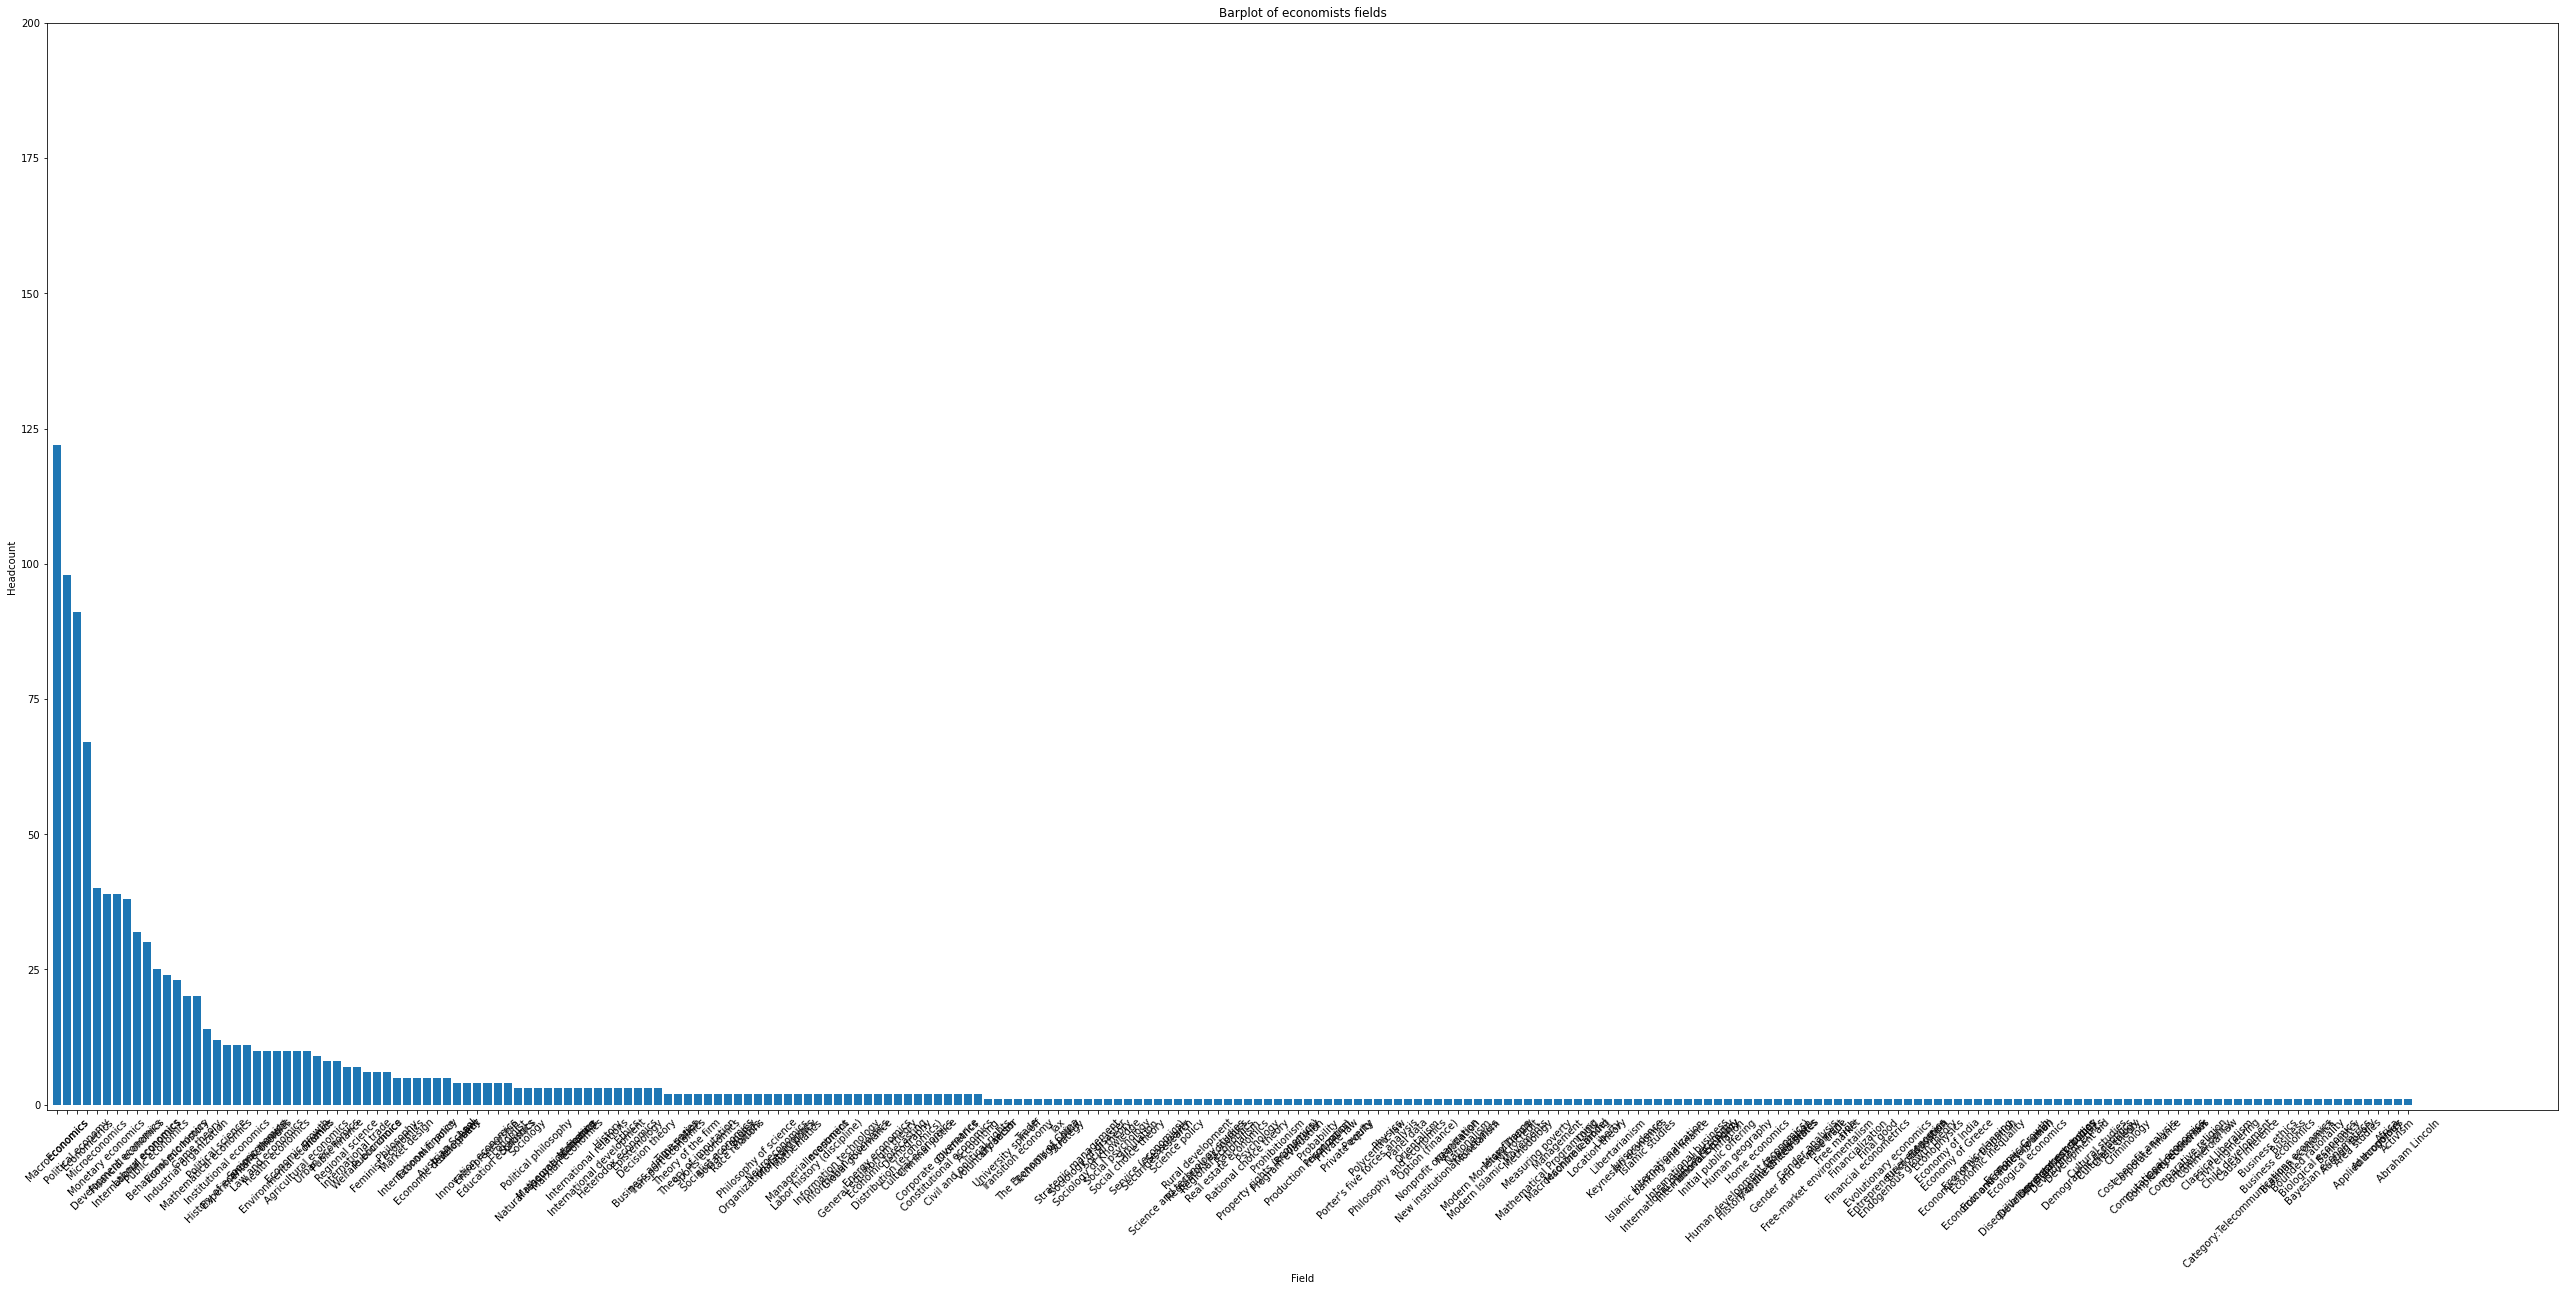

In [81]:
# Barplot of economists fields
eff = [l[1] for l in groupedFieldList]
objects = [l[0] for l in groupedFieldList]

p1 = plt.bar(eff, objects)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of economists fields')
plt.gcf().set_size_inches(45, 20)
plt.xticks(rotation=45)

p1 = plt.figure(1, [20, 3])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,250)
ax.set_ylim(-1,200)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)
plt.show()

In [86]:
bGFL=groupedFieldList[:30]

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


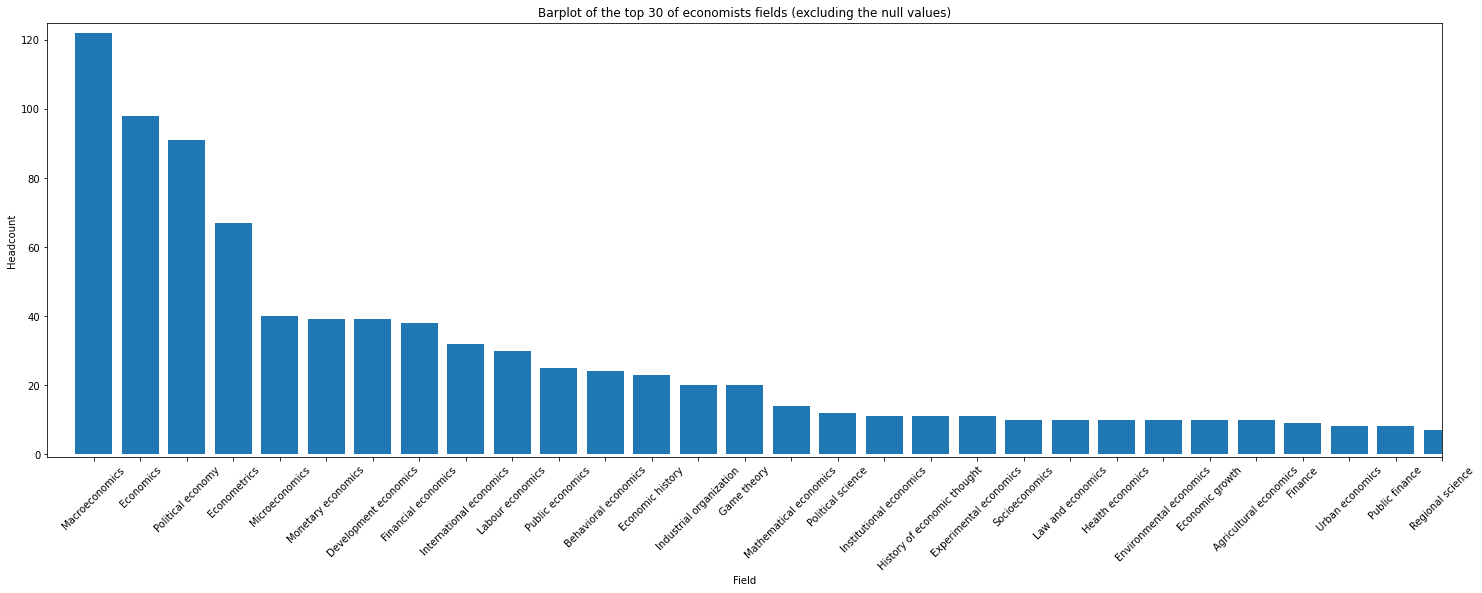

In [87]:
# Barplot of the top 30 of economists fields
eff1 = [l[1] for l in bGFL]
objects1 = [l[0] for l in bGFL]

p1 = plt.bar(eff1, objects1)

plt.ylabel('Headcount')
plt.xlabel('Field')
plt.title('Barplot of the top 30 of economists fields (excluding the null values)')
plt.gcf().set_size_inches(25, 8)

p1 = plt.figure(1, [20, 8])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,29)
ax.set_ylim(-1,125)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=45)
plt.show()